In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df.head().T

0             1               2  \
customerID              7590-VHVEG    5575-GNVDE      3668-QPYBK   
gender                      Female          Male            Male   
SeniorCitizen                    0             0               0   
Partner                        Yes            No              No   
Dependents                      No            No              No   
tenure                           1            34               2   
PhoneService                    No           Yes             Yes   
MultipleLines     No phone service            No              No   
InternetService                DSL           DSL             DSL   
OnlineSecurity                  No           Yes             Yes   
OnlineBackup                   Yes            No             Yes   
DeviceProtection                No           Yes              No   
TechSupport                     No            No              No   
StreamingTV                     No            No              No   
StreamingMovies                 No            No              No   
Contract            Month-to-month      One year  Month-to-month   
PaperlessBilling               Yes            No             Yes   
PaymentMethod     Electronic check  Mailed check    Mailed check   
MonthlyCharges               29.85         56.95           53.85   
TotalCharges                 29.85        1889.5          108.15   
Churn                           No            No             Yes   

                                          3                 4  
customerID                       7795-CFOCW        9237-HQITU  
gender                                 Male            Female  
SeniorCitizen                             0                 0  
Partner                                  No                No  
Dependents                               No                No  
tenure                                   45                 2  
PhoneService                             No               Yes  
MultipleLines              No phone service                No  
InternetService                         DSL       Fiber optic  
OnlineSecurity                          Yes                No  
OnlineBackup                             No                No  
DeviceProtection                        Yes                No  
TechSupport                             Yes                No  
StreamingTV                              No                No  
StreamingMovies                          No                No  
Contract                           One year    Month-to-month  
PaperlessBilling                         No               Yes  
PaymentMethod     Bank transfer (automatic)  Electronic check  
MonthlyCharges                         42.3              70.7  
TotalCharges                        1840.75            151.65  
Churn                                    No               Yes

# 3.2 Data preparation

In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')
df.head().T

0             1               2  \
customerid              7590-vhveg    5575-gnvde      3668-qpybk   
gender                      female          male            male   
seniorcitizen                    0             0               0   
partner                        yes            no              no   
dependents                      no            no              no   
tenure                           1            34               2   
phoneservice                    no           yes             yes   
multiplelines     no_phone_service            no              no   
internetservice                dsl           dsl             dsl   
onlinesecurity                  no           yes             yes   
onlinebackup                   yes            no             yes   
deviceprotection                no           yes              no   
techsupport                     no            no              no   
streamingtv                     no            no              no   
streamingmovies                 no            no              no   
contract            month-to-month      one_year  month-to-month   
paperlessbilling               yes            no             yes   
paymentmethod     electronic_check  mailed_check    mailed_check   
monthlycharges               29.85         56.95           53.85   
totalcharges                 29.85        1889.5          108.15   
churn                           no            no             yes   

                                          3                 4  
customerid                       7795-cfocw        9237-hqitu  
gender                                 male            female  
seniorcitizen                             0                 0  
partner                                  no                no  
dependents                               no                no  
tenure                                   45                 2  
phoneservice                             no               yes  
multiplelines              no_phone_service                no  
internetservice                         dsl       fiber_optic  
onlinesecurity                          yes                no  
onlinebackup                             no                no  
deviceprotection                        yes                no  
techsupport                             yes                no  
streamingtv                              no                no  
streamingmovies                          no                no  
contract                           one_year    month-to-month  
paperlessbilling                         no               yes  
paymentmethod     bank_transfer_(automatic)  electronic_check  
monthlycharges                         42.3              70.7  
totalcharges                        1840.75            151.65  
churn                                    no               yes

In [5]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [6]:
tc = pd.to_numeric(df.totalcharges, errors='coerce')
tc

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: totalcharges, Length: 7043, dtype: float64

In [7]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

In [8]:
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [9]:
df.churn = (df.churn == 'yes').astype(int)

In [10]:
df.churn.head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

# 3.3 Setting up the validation framework

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
len(df_full_train), len(df_test)

(5634, 1409)

In [13]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25)

In [14]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [15]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [16]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [17]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

y_test

array([0, 0, 0, ..., 0, 0, 1])

# 3.4 EDA
* Check missing values
* Look at the target variable (churn)
* Look at numerical and categorical variables

In [18]:
df_full_train = df_full_train.reset_index(drop=True)
df_full_train

customerid  gender  seniorcitizen partner dependents  tenure  \
0     5442-pptjy    male              0     yes        yes      12   
1     6261-rcvns  female              0      no         no      42   
2     2176-osjuv    male              0     yes         no      71   
3     6161-erdgd    male              0     yes        yes      71   
4     2364-ufrom    male              0      no         no      30   
...          ...     ...            ...     ...        ...     ...   
5629  0781-lkxbr    male              1      no         no       9   
5630  3507-gasnp    male              0      no        yes      60   
5631  8868-wozgu    male              0      no         no      28   
5632  1251-krreg    male              0      no         no       2   
5633  5840-nvdcg  female              0     yes        yes      16   

     phoneservice multiplelines internetservice       onlinesecurity  ...  \
0             yes            no              no  no_internet_service  ...   
1             yes            no             dsl                  yes  ...   
2             yes           yes             dsl                  yes  ...   
3             yes           yes             dsl                  yes  ...   
4             yes            no             dsl                  yes  ...   
...           ...           ...             ...                  ...  ...   
5629          yes           yes     fiber_optic                   no  ...   
5630          yes            no              no  no_internet_service  ...   
5631          yes           yes     fiber_optic                   no  ...   
5632          yes           yes             dsl                   no  ...   
5633          yes            no             dsl                  yes  ...   

         deviceprotection          techsupport          streamingtv  \
0     no_internet_service  no_internet_service  no_internet_service   
1                     yes                  yes                   no   
2                      no                  yes                   no   
3                     yes                  yes                  yes   
4                      no                  yes                  yes   
...                   ...                  ...                  ...   
5629                  yes                   no                  yes   
5630  no_internet_service  no_internet_service  no_internet_service   
5631                  yes                   no                  yes   
5632                   no                   no                   no   
5633                   no                  yes                   no   

          streamingmovies        contract paperlessbilling  \
0     no_internet_service        two_year               no   
1                     yes        one_year               no   
2                      no        two_year               no   
3                     yes        one_year               no   
4                      no        one_year               no   
...                   ...             ...              ...   
5629                  yes  month-to-month              yes   
5630  no_internet_service        two_year               no   
5631                  yes  month-to-month              yes   
5632                   no  month-to-month              yes   
5633                  yes        two_year               no   

                  paymentmethod monthlycharges  totalcharges  churn  
0                  mailed_check          19.70        258.35      0  
1       credit_card_(automatic)          73.90       3160.55      1  
2     bank_transfer_(automatic)          65.15       4681.75      0  
3              electronic_check          85.45       6300.85      0  
4              electronic_check          70.40       2044.75      0  
...                         ...            ...           ...    ...  
5629           electronic_check         100.50        918.60      1  
5630               mailed_check          19.95       1189.90      0  
5631        

In [19]:
df_full_train.churn.value_counts(normalize=True)

0    0.730032
1    0.269968
Name: churn, dtype: float64

In [20]:
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate, 2)

0.27

In [21]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [22]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [23]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [24]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [25]:
df_full_train[categorical]

gender  seniorcitizen partner dependents phoneservice multiplelines  \
0       male              0     yes        yes          yes            no   
1     female              0      no         no          yes            no   
2       male              0     yes         no          yes           yes   
3       male              0     yes        yes          yes           yes   
4       male              0      no         no          yes            no   
...      ...            ...     ...        ...          ...           ...   
5629    male              1      no         no          yes           yes   
5630    male              0      no        yes          yes            no   
5631    male              0      no         no          yes           yes   
5632    male              0      no         no          yes           yes   
5633  female              0     yes        yes          yes            no   

     internetservice       onlinesecurity         onlinebackup  \
0                 no  no_internet_service  no_internet_service   
1                dsl                  yes                  yes   
2                dsl                  yes                  yes   
3                dsl                  yes                   no   
4                dsl                  yes                  yes   
...              ...                  ...                  ...   
5629     fiber_optic                   no                   no   
5630              no  no_internet_service  no_internet_service   
5631     fiber_optic                   no                  yes   
5632             dsl                   no                  yes   
5633             dsl                  yes                  yes   

         deviceprotection          techsupport          streamingtv  \
0     no_internet_service  no_internet_service  no_internet_service   
1                     yes                  yes                   no   
2                      no                  yes                   no   
3                     yes                  yes                  yes   
4                      no                  yes                  yes   
...                   ...                  ...                  ...   
5629                  yes                   no                  yes   
5630  no_internet_service  no_internet_service  no_internet_service   
5631                  yes                   no                  yes   
5632                   no                   no                   no   
5633                   no                  yes                   no   

          streamingmovies        contract paperlessbilling  \
0     no_internet_service        two_year               no   
1                     yes        one_year               no   
2                      no        two_year               no   
3                     yes        one_year               no   
4                      no        one_year               no   
...                   ...             ...              ...   
5629                  yes  month-to-month              yes   
5630  no_internet_service        two_year               no   
5631                  yes  month-to-month              yes   
5632                   no  month-to-month              yes   
5633                  yes        two_year               no   

                  paymentmethod  
0                  mailed_check  
1       credit_card_(automatic)  
2     bank_transfer_(automatic)  
3              electronic_check  
4              electronic_check  
...                         ...  
5629           electronic_check  
5630               mailed_check  
5631           electronic_check  
5632               mailed_check  
5633  bank_transfer_(automatic)  

[5634 rows x 16 columns]

In [26]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

# 3.5 Leature importance: Churn rate and risk ratio
Feature importance analysis (part of EDA) - identifying which features affect our target variable
* Churn rate
* Rist ratio 
* Mutual information - later

In [27]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female, churn_male

(0.27682403433476394, 0.2632135306553911)

In [28]:
global_churn = df_full_train.churn.mean()
global_churn

0.26996805111821087

In [29]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_partner, churn_no_partner

(0.20503330866025166, 0.3298090040927694)

### Feature importance
* Difference
    // If result > 0 not Imp else less 0 then it's Imp
    * global_charn - group_churn
* Risk Ration // If result > 1 Risk else result <= 1 then not Risk
    * Risk = (group/global)

In [30]:
global_churn - churn_male, global_churn - churn_female
# Doesn't effect so much

(0.006754520462819769, -0.006855983216553063)

In [31]:
global_churn - churn_partner, global_churn - churn_no_partner

(0.06493474245795922, -0.05984095297455855)

In [32]:
churn_no_partner / global_churn

1.2216593879412643

In [33]:
churn_partner / global_churn

0.7594724924338315

### Sequal query

In [34]:
from IPython.display import display

In [35]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean'] / global_churn
    display(df_group)
    print()

gender


mean  count      diff      risk
gender                                     
female  0.276824   2796  0.006856  1.025396
male    0.263214   2838 -0.006755  0.974980


seniorcitizen


mean  count      diff      risk
seniorcitizen                                     
0              0.242270   4722 -0.027698  0.897403
1              0.413377    912  0.143409  1.531208


partner


mean  count      diff      risk
partner                                     
no       0.329809   2932  0.059841  1.221659
yes      0.205033   2702 -0.064935  0.759472


dependents


mean  count      diff      risk
dependents                                     
no          0.313760   3968  0.043792  1.162212
yes         0.165666   1666 -0.104302  0.613651


phoneservice


mean  count      diff      risk
phoneservice                                     
no            0.241316    547 -0.028652  0.893870
yes           0.273049   5087  0.003081  1.011412


multiplelines


mean  count      diff      risk
multiplelines                                        
no                0.257407   2700 -0.012561  0.953474
no_phone_service  0.241316    547 -0.028652  0.893870
yes               0.290742   2387  0.020773  1.076948


internetservice


mean  count      diff      risk
internetservice                                     
dsl              0.192347   1934 -0.077621  0.712482
fiber_optic      0.425171   2479  0.155203  1.574895
no               0.077805   1221 -0.192163  0.288201


onlinesecurity


mean  count      diff      risk
onlinesecurity                                          
no                   0.420921   2801  0.150953  1.559152
no_internet_service  0.077805   1221 -0.192163  0.288201
yes                  0.153226   1612 -0.116742  0.567570


onlinebackup


mean  count      diff      risk
onlinebackup                                            
no                   0.404323   2498  0.134355  1.497672
no_internet_service  0.077805   1221 -0.192163  0.288201
yes                  0.217232   1915 -0.052736  0.804660


deviceprotection


mean  count      diff      risk
deviceprotection                                        
no                   0.395875   2473  0.125907  1.466379
no_internet_service  0.077805   1221 -0.192163  0.288201
yes                  0.230412   1940 -0.039556  0.853480


techsupport


mean  count      diff      risk
techsupport                                             
no                   0.418914   2781  0.148946  1.551717
no_internet_service  0.077805   1221 -0.192163  0.288201
yes                  0.159926   1632 -0.110042  0.592390


streamingtv


mean  count      diff      risk
streamingtv                                             
no                   0.342832   2246  0.072864  1.269897
no_internet_service  0.077805   1221 -0.192163  0.288201
yes                  0.302723   2167  0.032755  1.121328


streamingmovies


mean  count      diff      risk
streamingmovies                                         
no                   0.338906   2213  0.068938  1.255358
no_internet_service  0.077805   1221 -0.192163  0.288201
yes                  0.307273   2200  0.037305  1.138182


contract


mean  count      diff      risk
contract                                           
month-to-month  0.431701   3104  0.161733  1.599082
one_year        0.120573   1186 -0.149395  0.446621
two_year        0.028274   1344 -0.241694  0.104730


paperlessbilling


mean  count      diff      risk
paperlessbilling                                     
no                0.172071   2313 -0.097897  0.637375
yes               0.338151   3321  0.068183  1.252560


paymentmethod


mean  count      diff      risk
paymentmethod                                                 
bank_transfer_(automatic)  0.168171   1219 -0.101797  0.622928
credit_card_(automatic)    0.164339   1217 -0.105630  0.608733
electronic_check           0.455890   1893  0.185922  1.688682
mailed_check               0.193870   1305 -0.076098  0.718121

# 3.6 Leature importance: Mutual information

In [36]:
from sklearn.metrics import mutual_info_score

In [37]:
mutual_info_score(df_full_train.churn, df_full_train.gender)

0.0001174846211139946

In [38]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [39]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

# 3.7 Leature importance: Correlation Coefficient

In [40]:
df_full_train.tenure.max()

72

In [41]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [42]:
df_full_train[(df_full_train.tenure >= 2) & df_full_train.tenure <= 12].churn.mean()

0.26996805111821087

In [43]:
df_full_train[df_full_train.tenure > 12].churn.mean()

0.17634908339788277

In [44]:
df_full_train[df_full_train.monthlycharges > 50].churn.mean()

0.32499341585462205

In [45]:
df_full_train[df_full_train.monthlycharges < 50].churn.mean()

0.1564032697547684

# 3.8 One-hot encoding
* Use Scikit-Learn to encode categorical features

In [46]:
from sklearn.feature_extraction import DictVectorizer

In [47]:
df_train[['gender', 'contract']].iloc[:10].to_dict()

{'gender': {0: 'male',
  1: 'female',
  2: 'male',
  3: 'female',
  4: 'male',
  5: 'male',
  6: 'female',
  7: 'female',
  8: 'female',
  9: 'female'},
 'contract': {0: 'two_year',
  1: 'one_year',
  2: 'month-to-month',
  3: 'month-to-month',
  4: 'month-to-month',
  5: 'one_year',
  6: 'month-to-month',
  7: 'month-to-month',
  8: 'two_year',
  9: 'one_year'}}

In [48]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

In [49]:
dv = DictVectorizer(sparse=False)

In [50]:
X_train = dv.fit_transform(train_dicts)
X_train.shape

(4225, 45)

In [51]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

In [52]:
X_val = dv.transform(val_dicts)

In [108]:
val_dicts[4]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'no',
 'dependents': 'no',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'no',
 'onlinesecurity': 'no_internet_service',
 'onlinebackup': 'no_internet_service',
 'deviceprotection': 'no_internet_service',
 'techsupport': 'no_internet_service',
 'streamingtv': 'no_internet_service',
 'streamingmovies': 'no_internet_service',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 27,
 'monthlycharges': 19.6,
 'totalcharges': 561.15}

# 3.9 Logistic regression
* Binary classification
* Linear vs logistic regression

In [54]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [55]:
np.exp(25)

72004899337.38588

In [56]:
np.log(25)

3.2188758248682006

In [57]:
np.exp(3.2188758248682006)

24.999999999999996

In [58]:
z = np.linspace(-7, 7, 51)

In [59]:
sigmoid(10000000)

1.0

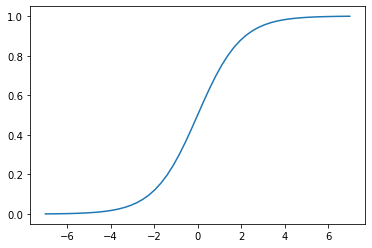

In [60]:
plt.plot(z, sigmoid(z))

In [61]:
def linear_regression(xi):
    result = w0
    for j in range(len(w)):
        result += xi[j] * w[j]
    return result

In [62]:
def logistic_regression(xi):
    score = w0
    for j in range(len(w)):
        score += xi[j] * w[j]
        
    result = sigmoid(score)
    return result

In [63]:
y_val

array([0, 0, 0, ..., 0, 1, 0])

# 3.10 Training logistic regression with Scikit-Learn
* Train a model with Scikit-Learn
* Apply it to the validation dataset
* Calculate the accuracy

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [66]:
model.intercept_[0]

-0.152603092286038

In [67]:
model.coef_[0].round(3)

array([ 0.614, -0.03 , -0.737, -0.038, -0.114,  0.032, -0.12 , -0.064,
       -0.088, -0.065, -0.395,  0.363, -0.12 ,  0.003, -0.239,  0.111,
       -0.024,  0.06 , -0.12 , -0.092,  0.194, -0.12 , -0.226, -0.234,
        0.081, -0.083, -0.069, -0.176, -0.102,  0.17 , -0.044,  0.111,
       -0.263,  0.283, -0.142, -0.12 ,  0.11 , -0.064, -0.12 ,  0.032,
        0.166, -0.12 , -0.198, -0.059,  0.   ])

In [68]:
y_pred = model.predict_proba(X_val)[:, 1]

In [69]:
y_pred

array([0.06342818, 0.36485191, 0.05921909, ..., 0.02297322, 0.26146827,
       0.4854575 ])

In [70]:
churn_descision = (y_pred >= 0.5)

In [71]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_descision.astype(int)
df_pred['actual'] = y_val

In [72]:
df_pred

probability  prediction  actual
0        0.063428           0       0
1        0.364852           0       0
2        0.059219           0       0
3        0.309734           0       1
4        0.022555           0       0
...           ...         ...     ...
1404     0.001848           0       0
1405     0.145035           0       0
1406     0.022973           0       0
1407     0.261468           0       1
1408     0.485457           0       0

[1409 rows x 3 columns]

In [73]:
df_pred['correct'] = df_pred.prediction == df_pred.actual
df_pred[:60]

probability  prediction  actual  correct
0      0.063428           0       0     True
1      0.364852           0       0     True
2      0.059219           0       0     True
3      0.309734           0       1    False
4      0.022555           0       0     True
5      0.240557           0       0     True
6      0.207681           0       0     True
7      0.018994           0       0     True
8      0.731232           1       1     True
9      0.035407           0       0     True
10     0.127908           0       0     True
11     0.794667           1       1     True
12     0.546793           1       1     True
13     0.551402           1       1     True
14     0.112667           0       1    False
15     0.007928           0       0     True
16     0.045396           0       0     True
17     0.002697           0       0     True
18     0.031843           0       0     True
19     0.042778           0       0     True
20     0.574311           1       0    False
21     0.431884           0       0     True
22     0.314982           0       0     True
23     0.398040           0       0     True
24     0.110191           0       0     True
25     0.445190           0       0     True
26     0.707012           1       1     True
27     0.054132           0       0     True
28     0.011207           0       0     True
29     0.017549           0       0     True
30     0.116744           0       0     True
31     0.040075           0       0     True
32     0.213461           0       1    False
33     0.015890           0       0     True
34     0.249673           0       0     True
35     0.830221           1       1     True
36     0.522946           1       1     True
37     0.597391           1       1     True
38     0.734674           1       1     True
39     0.001446           0       0     True
40     0.418351           0       0     True
41     0.433679           0       1    False
42     0.323626           0       0     True
43     0.060916           0       0     True
44     0.651700           1       0    False
45     0.386167           0       1    False
46     0.527902           1       1     True
47     0.001961           0       0     True
48     0.639702           1       1     True
49     0.150730           0       0     True
50     0.748941           1       1     True
51     0.593141           1       1     True
52     0.135016           0       0     True
53     0.572610           1       0    False
54     0.018721           0       0     True
55     0.560915           1       1     True
56     0.563216           1       1     True
57     0.624062           1       1     True
58     0.001330           0       0     True
59     0.603508           1       0    False

In [74]:
df_pred.correct.mean()

0.8019872249822569

# 3.11 Model Interpretation
* Look at the coefficients
* Train a smaller model with fewer features

In [75]:
dv.get_feature_names()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

In [76]:
model.coef_[0].round(3)

array([ 0.614, -0.03 , -0.737, -0.038, -0.114,  0.032, -0.12 , -0.064,
       -0.088, -0.065, -0.395,  0.363, -0.12 ,  0.003, -0.239,  0.111,
       -0.024,  0.06 , -0.12 , -0.092,  0.194, -0.12 , -0.226, -0.234,
        0.081, -0.083, -0.069, -0.176, -0.102,  0.17 , -0.044,  0.111,
       -0.263,  0.283, -0.142, -0.12 ,  0.11 , -0.064, -0.12 ,  0.032,
        0.166, -0.12 , -0.198, -0.059,  0.   ])

In [77]:
a = [1,2,3,4]
b = [1,22,3,4]
list(zip(a, b))

[(1, 1), (2, 22), (3, 3), (4, 4)]

In [78]:
dict(zip(dv.get_feature_names(), model.coef_[0].round(3)))

{'contract=month-to-month': 0.614,
 'contract=one_year': -0.03,
 'contract=two_year': -0.737,
 'dependents=no': -0.038,
 'dependents=yes': -0.114,
 'deviceprotection=no': 0.032,
 'deviceprotection=no_internet_service': -0.12,
 'deviceprotection=yes': -0.064,
 'gender=female': -0.088,
 'gender=male': -0.065,
 'internetservice=dsl': -0.395,
 'internetservice=fiber_optic': 0.363,
 'internetservice=no': -0.12,
 'monthlycharges': 0.003,
 'multiplelines=no': -0.239,
 'multiplelines=no_phone_service': 0.111,
 'multiplelines=yes': -0.024,
 'onlinebackup=no': 0.06,
 'onlinebackup=no_internet_service': -0.12,
 'onlinebackup=yes': -0.092,
 'onlinesecurity=no': 0.194,
 'onlinesecurity=no_internet_service': -0.12,
 'onlinesecurity=yes': -0.226,
 'paperlessbilling=no': -0.234,
 'paperlessbilling=yes': 0.081,
 'partner=no': -0.083,
 'partner=yes': -0.069,
 'paymentmethod=bank_transfer_(automatic)': -0.176,
 'paymentmethod=credit_card_(automatic)': -0.102,
 'paymentmethod=electronic_check': 0.17,
 'pa

In [79]:
small = ['contract', 'tenure', 'monthlycharges']

In [80]:
 df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 53, 'monthlycharges': 69.7},
 {'contract': 'one_year', 'tenure': 37, 'monthlycharges': 20.3},
 {'contract': 'month-to-month', 'tenure': 31, 'monthlycharges': 93.8},
 {'contract': 'month-to-month', 'tenure': 11, 'monthlycharges': 89.2},
 {'contract': 'month-to-month', 'tenure': 44, 'monthlycharges': 68.85},
 {'contract': 'one_year', 'tenure': 66, 'monthlycharges': 110.85},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 19.25},
 {'contract': 'month-to-month', 'tenure': 64, 'monthlycharges': 43.85},
 {'contract': 'two_year', 'tenure': 23, 'monthlycharges': 91.1},
 {'contract': 'one_year', 'tenure': 72, 'monthlycharges': 105.0}]

In [81]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [82]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [83]:
dv_small.get_feature_names()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'monthlycharges',
 'tenure']

In [84]:
dv_small

DictVectorizer(sparse=False)

In [85]:
X_train_small = dv_small.transform(dicts_train_small)
X_train_small

array([[ 0. ,  0. ,  1. , 69.7, 53. ],
       [ 0. ,  1. ,  0. , 20.3, 37. ],
       [ 1. ,  0. ,  0. , 93.8, 31. ],
       ...,
       [ 1. ,  0. ,  0. , 95.9,  9. ],
       [ 1. ,  0. ,  0. , 71.3, 20. ],
       [ 0. ,  1. ,  0. , 54.9, 50. ]])

In [86]:
model_small = LogisticRegression(solver='liblinear')
model_small.fit(X_train_small, y_train)

LogisticRegression(solver='liblinear')

In [87]:
w0 = model_small.intercept_[0]
w0

-1.934370950231021

In [88]:
w = model_small.coef_[0]
w.round(3)

array([ 0.353, -0.626, -1.662,  0.028, -0.035])

In [89]:
dict(zip(dv_small.get_feature_names(), w.round(3)))

{'contract=month-to-month': 0.353,
 'contract=one_year': -0.626,
 'contract=two_year': -1.662,
 'monthlycharges': 0.028,
 'tenure': -0.035}

In [90]:
sigmoid(-1.97 + 1 * 0.39 + 0 * (-0.68) + 0 * (-1.68) + 50 * 0.02 + 7 * (-0.03))

0.3121686694171596

In [91]:
-1.97 + 1 * 0.39 + 0 * (-0.68) + 0 * (-1.68) + 80 * 0.02 + 0 * (-0.03)

0.020000000000000018

In [92]:
sigmoid(_)

0.5049998333399998

# 3.12 Using the model

In [93]:
dicts_df_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

In [94]:
dicts_df_full_train

[{'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'yes',
  'dependents': 'yes',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'no',
  'onlinesecurity': 'no_internet_service',
  'onlinebackup': 'no_internet_service',
  'deviceprotection': 'no_internet_service',
  'techsupport': 'no_internet_service',
  'streamingtv': 'no_internet_service',
  'streamingmovies': 'no_internet_service',
  'contract': 'two_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'mailed_check',
  'tenure': 12,
  'monthlycharges': 19.7,
  'totalcharges': 258.35},
 {'gender': 'female',
  'seniorcitizen': 0,
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'dsl',
  'onlinesecurity': 'yes',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'no',
  'streamingmovies': 'yes',
  'contract': 'one_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'credit_card_(automatic)',
  'tenur

In [95]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_df_full_train)

In [96]:
y_full_train = df_full_train.churn.values

In [97]:
model = LogisticRegression()
model.fit(X_full_train, y_full_train)

LogisticRegression()

In [98]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

In [99]:
X_test = dv.transform(dicts_test)

In [100]:
y_pred = model.predict_proba(X_test)[:, 1]

In [101]:
churn_decision = (y_pred >= 0.5)
churn_decision

array([False, False, False, ..., False, False,  True])

In [102]:
(churn_decision == y_test).mean()

0.815471965933286

In [103]:
customer = dicts_test[10]
customer

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [104]:
X_cus = dv.transform(customer)

In [105]:
model.predict_proba(X_cus)

array([[0.5943189, 0.4056811]])

In [106]:
y_test[10]

0